## Define

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import pytesseract
import cv2
import re
from scipy.ndimage import rotate

In [3]:
def disp_img(img):
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [4]:
def preprocess(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

In [ ]:
def get_details(img, text, regex_dict, margin=10):
    for label, r in regex_dict.items():
        # Clean text according to regex r
        detail = [(id, text) for id, text in enumerate(data['text']) if r.match(text)]
    
        # Mark locations on image
        for (id, text) in details:
            left = data['left'][id] - margin
            top = data['top'][id] - margin
            width = data['width'][id] + 2*margin
            height = data['height'][id] + 2*margin
            cv2.rectangle(img, (left, top), (left+width, top+height), (0, 0, 255), 4)
    return img, details

In [2]:
DOB = re.compile("([0-9]{2}/[0-9]{2}/[0-9]{4})")
NAME = re.compile("[A-Z]")
PAN_ID = re.compile("[A-Z]{5}[0-9]{4}[A-Z]{1}")

regex_dict = {'Date of Birth': DOB, 'Name': NAME, 'Pan No': PAN_ID}
r = re.compile("([A-Z]{5}[0-9]{4}[A-Z]{1})|([0-9]{2}/[0-9]{2}/[0-9]{4})")

In [5]:
margin = 10
    
def identify_pan_card(img):
    # Preprocess
    img = preprocess(img)
    
    # Extract text
    text = pytesseract.image_to_data(img, output_type='dict')
    
    # Get details and mark them on the text
    img, details = get_details(img, text, regex_dict)
    
    return img, details

## Test

NameError: name 'r' is not defined

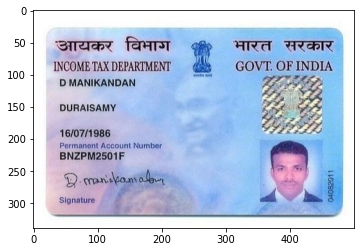

In [6]:
img = cv2.imread('dataset/PanTest_2.jpg') # BGR format
disp_img(img)

img_marked, details = identify_pan_card(img)
disp_img(img_marked)